<a href="https://colab.research.google.com/github/Omar-Basel-ALkhasawneh/JoVision_AI-Tasks/blob/main/AI_JoVision_task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16965, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 16965 (delta 79), reused 99 (delta 49), pack-reused 16805 (from 1)
Receiving objects: 100% (16965/16965), 15.71 MiB | 14.04 MiB/s, done.
Resolving deltas: 100% (11612/11612), done.


In [2]:
%cd yolov5

/content/yolov5


In [3]:
!pip install -r requirements.txt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 874.0/874.0 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.2 MB/s eta 0:00:00


In [4]:
import multiprocessing as mp
mp.set_start_method('spawn', force=True)


In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="M60qjaFCJgOCoBdm4xTS")
project = rf.workspace("aitasks-iylpd").project("chess-classification-jqqmg")
version = project.version(2)
dataset = version.download("yolov5")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to chess-classification--2 in yolov5pytorch:: 100%|██████████| 248/248 [00:00<00:00, 6420.08it/s]


In [6]:
from torch.amp import GradScaler, autocast


In [7]:
!python train.py --img 640 --batch 32 --epochs 100 --data /content/yolov5/chess-classification--2/data.yaml --workers 1 --weights yolov5s.pt


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/chess-classification--2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=1, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_consol

In [9]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source  /content/test.jpg


detect: weights=['runs/train/exp/weights/best.pt'], source=/content/test.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-368-gb163ff8d Python-3.10.12 torch-2.4.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/test.jpg: 640x640 16 Pawns, 1 king, 5 knights, 2 queens, 4 rooks, 93.2ms
Speed: 1.0ms pre-process, 93.2ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


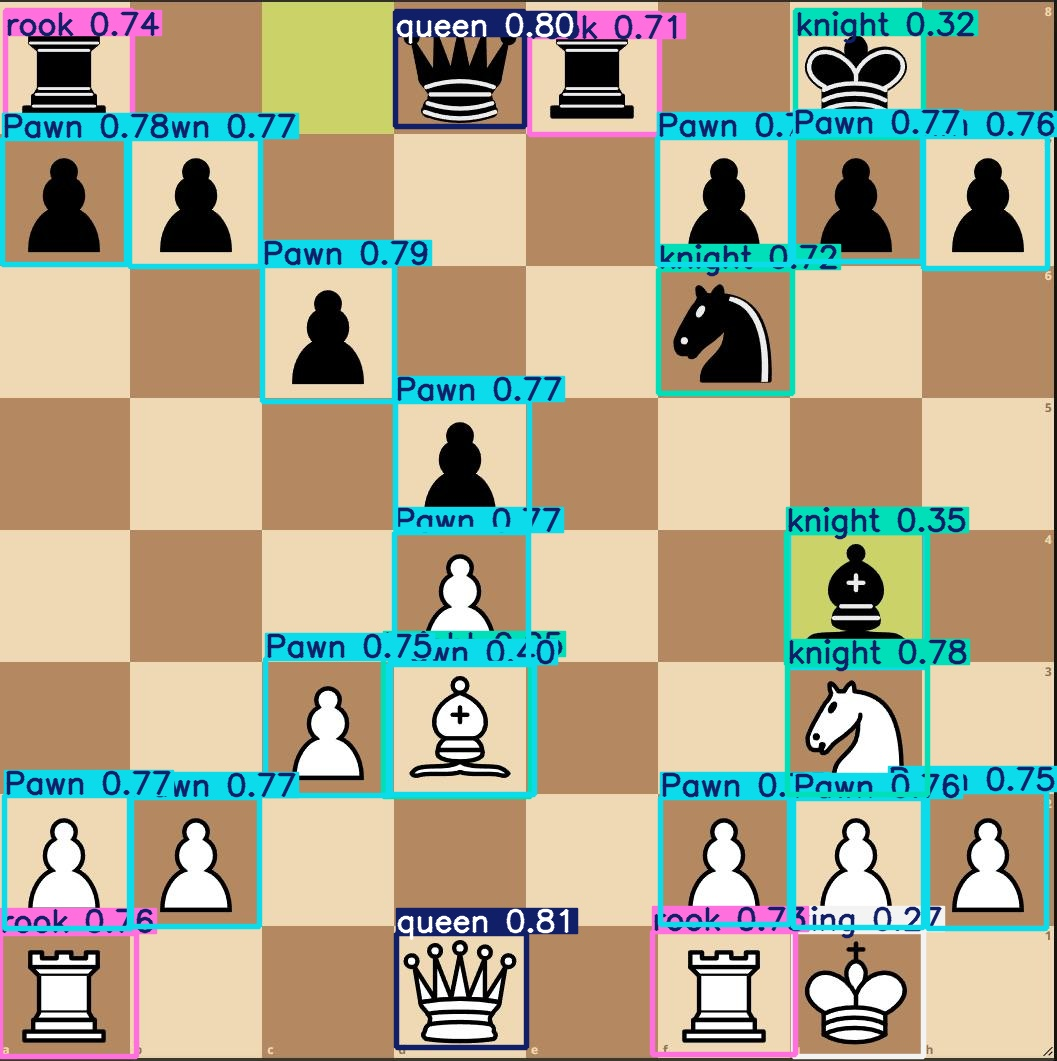

In [10]:
from IPython.display import Image, display

# Adjust the path if necessary
display(Image(filename='/content/yolov5/runs/detect/exp2/test.jpg'))